In [1]:
import gensim

word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [41]:
import pandas as pd

#df = pd.read_csv('sample_train_tokens.csv')
df = pd.read_csv('tokenized text data2.csv')

In [44]:
df.shape

(67529, 21)

In [45]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, df, generate_missing=False):
    embeddings = df['tokenized_pros'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [46]:
embeddings = get_word2vec_embeddings(word2vec, df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, df['company'], 
                                                                                        test_size=0.2, random_state=40)

In [47]:
len(embeddings)

67529

1.3341628821394176
0.4621883898886381
{'apple': 0, 'google': 1, 'facebook': 2, 'netflix': 3, 'microsoft': 4, 'amazon': 5}
True


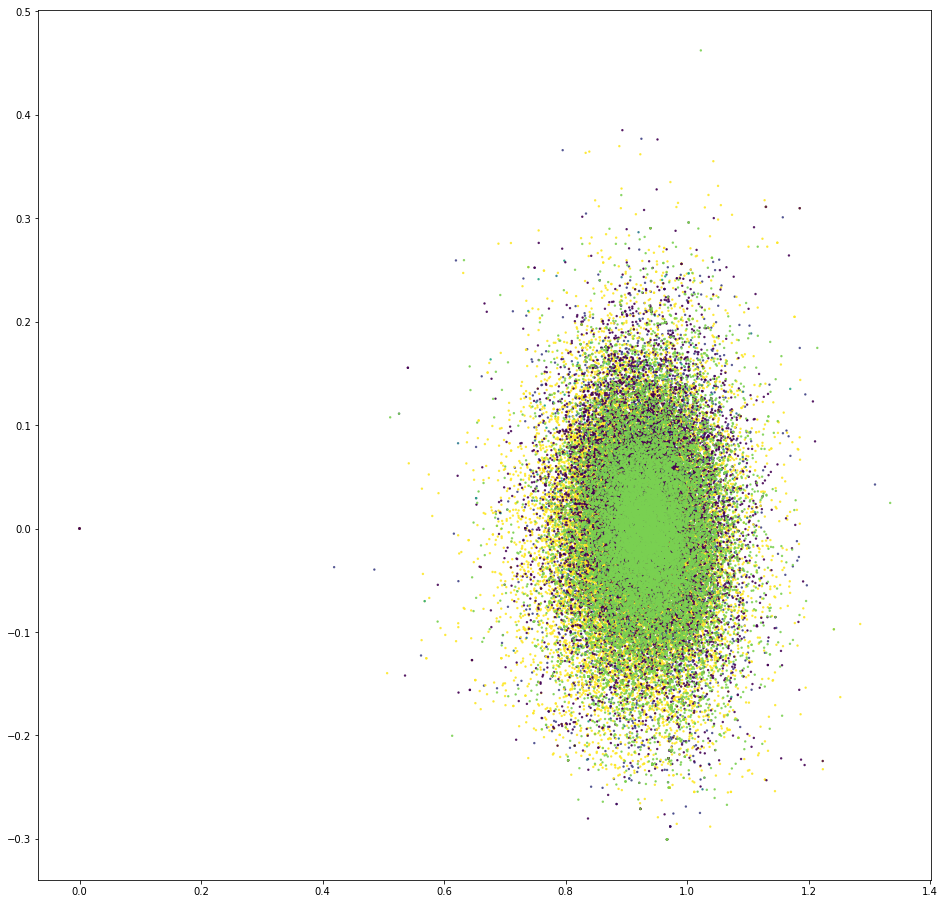

In [50]:
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        print(max(lsa_scores[:,0]))
        print(max(lsa_scores[:,1]))
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        print(color_mapper)
        #print(test_labels)
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue', 'red', 'green', 'yellow', 'pink']
        if plot:
            print(plot)
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=2, alpha=.8, c=color_column)



fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, df['company'])
plt.show()

In [52]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(embeddings)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df['company']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('herro', fontsize=24);

C:\Users\joeson34\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


KeyboardInterrupt: 

In [56]:
from sklearn.linear_model import LogisticRegression
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [57]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [60]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.266, precision = 0.396, recall = 0.266, f1 = 0.306
